# Crawling Berita

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Input URL Berita
url = "https://www.antaranews.com/berita/3798024/anies-muhaimin-ajak-warga-jember-doakan-rakyat-palestina"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="post-content clearfix")

if article:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



				Jember, Jawa Timur (ANTARA) - Pasangan bakal calon presiden (capres) dan calon wakil presiden (cawapres) , Anies Baswedan dan Muhaimin Iskandar mengajak warga Kabupaten Jember, Jawa Timur mendoakan rakyat Palestina agar segera merdeka dan menjadi bangsa yang mandiri.
"Mari berdoa untuk saudara kita di Palestina, memohon agar rakyat Palestina selamat dari gempuran Israel dan segera merdeka," kata Muhaimin di sela-sela kegiatan safari politiknya di Jember, Minggu.
Ia mengajak ribuan warga yang hadir dalam kegiatan jalan sehat bersarung di Jember untuk membaca surat Al-Fatihah bersama-sama dengan harapan bangsa Palestina segera merdeka dan menjadi bangsa yang mandiri.
"Bangsa Indonesia diharapkan memberikan jalan keluar.
Semua ikhtiar sudah dilakukan dan diplomasi oleh Menteri Luar Negeri Bu Retno sudah dijalankan, namun PBB tumpul tak berdaya," tuturnya.
Menurutnya Indonesia harus memberikan pertolongan kepada rakyat Palestina karena Indonesia sebagai negara dengan penduduk muslim t

In [ ]:
# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Jember, Jawa Timur (ANTARA) - Pasangan bakal calon presiden (capres) dan calon wakil presiden (cawapres) , Anies Baswedan dan Muhaimin Iskandar mengajak warga Kabupaten Jember, Jawa Timur mendoakan rakyat Palestina agar segera merdeka dan menjadi bangsa yang mandiri.
agar: 0.1435
anies: 0.1284
antara: 0.1435
bakal: 0.1648
bangsa: 0.0990
baswedan: 0.1284
calon: 0.3295
capres: 0.1648
cawapres: 0.1648
dan: 0.2409
iskandar: 0.1648
jawa: 0.3295
jember: 0.2568
kabupaten: 0.1648
mandiri: 0.1435
mendoakan: 0.1648
mengajak: 0.1435
menjadi: 0.1284
merdeka: 0.1167
muhaimin: 0.1284
palestina: 0.0803
pasangan: 0.1648
presiden: 0.3295
rakyat: 0.1071
segera: 0.1284
timur: 0.3295
wakil: 0.1435
warga: 0.1284
yang: 0.0920

Kalimat 2: "Mari berdoa untuk saudara kita di Palestina, memohon agar rakyat Palestina selamat dari gempuran Israel dan segera merdeka," kata Muhaimin di sela-sela kegiatan safari politiknya di Jember, Minggu.
agar: 0.1739
berdoa: 0.1997
dan: 0.0973
dari: 0.1739
di: 0.

In [ ]:
# Indeks kalimat yang akan dibandingkan
sentence1_index = 0
sentence2_index = 1

# Vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# menghitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1743


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1743
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.2519
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0287
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0272
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0249
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0615
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.1206
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.1547
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0368
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0132
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0416
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0175
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0882
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.1181
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.2026
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.0000
Cosine Similarity antara

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16
Kalimat 1,1.000000,0.174334,0.251905,0.028700,0.027159,0.024892,0.061458,0.120632,0.154712,0.036799,0.013164,0.041588,0.017502,0.000000,0.088204,0.118053
Kalimat 2,0.174334,1.000000,0.202564,0.000000,0.010970,0.041019,0.224688,0.236869,0.074602,0.051642,0.033490,0.016799,0.000000,0.000000,0.090054,0.033790
Kalimat 3,0.251905,0.202564,1.000000,0.148516,0.011428,0.047398,0.054373,0.140987,0.133634,0.135729,0.068119,0.017499,0.044185,0.000000,0.176460,0.044356
Kalimat 4,0.028700,0.000000,0.148516,1.000000,0.000000,0.176947,0.000000,0.000000,0.000000,0.048643,0.083603,0.000000,0.000000,0.000000,0.061970,0.067310
Kalimat 5,0.027159,0.010970,0.011428,0.000000,1.000000,0.000000,0.011994,0.013271,0.148726,0.033514,0.000000,0.081561,0.155361,0.082912,0.069504,0.000000
Kalimat 6,0.024892,0.041019,0.047398,0.176947,0.000000,1.000000,0.049747,0.091534,0.034483,0.079325,0.098890,0.130473,0.047315,0.054251,0.009671,0.053804
Kalimat 7,0.061458,0.224688,0.054373,0.000000,0.011994,0.049747,1.000000,0.075672,0.023677,0.037640,0.000000,0.076988,0.000000,0.000000,0.055730,0.018471
Kalimat 8,0.120632,0.236869,0.140987,0.000000,0.013271,0.091534,0.075672,1.000000,0.182729,0.074768,0.000000,0.020322,0.025656,0.000000,0.169870,0.093108
Kalimat 9,0.154712,0.074602,0.133634,0.000000,0.148726,0.034483,0.023677,0.182729,1.000000,0.078300,0.000000,0.068284,0.118643,0.065524,0.140012,0.167396
Kalimat 10,0.036799,0.051642,0.135729,0.048643,0.033514,0.079325,0.037640,0.074768,0.078300,1.000000,0.022311,0.000000,0.347397,0.068515,0.253332,0.017963


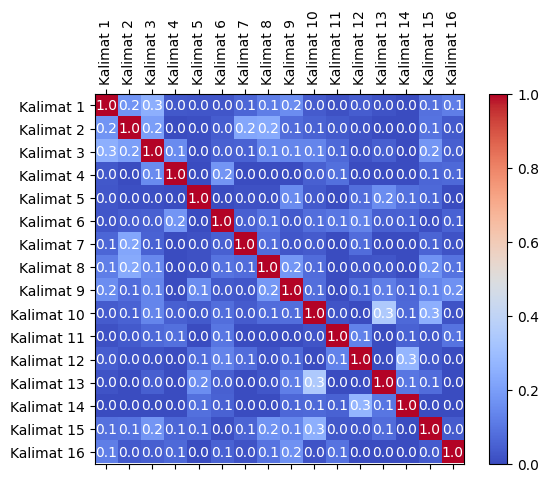

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Menghitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Membuat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.1f}', ha='center', va='center', color='w')

plt.show()

In [ ]:
# grafik dari matriks similarity
G = nx.Graph()

# menambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
				Jember, Jawa Timur (ANTARA) - Pasangan bakal calon presiden (capres) dan calon wakil presiden (cawapres) , Anies Baswedan dan Muhaimin Iskandar mengajak warga Kabupaten Jember, Jawa Timur mendoakan rakyat Palestina agar segera merdeka dan menjadi bangsa yang mandiri.: 26.8935
Closeness Centrality of "Mari berdoa untuk saudara kita di Palestina, memohon agar rakyat Palestina selamat dari gempuran Israel dan segera merdeka," kata Muhaimin di sela-sela kegiatan safari politiknya di Jember, Minggu.: 25.6711
Closeness Centrality of Ia mengajak ribuan warga yang hadir dalam kegiatan jalan sehat bersarung di Jember untuk membaca surat Al-Fatihah bersama-sama dengan harapan bangsa Palestina segera merdeka dan menjadi bangsa yang mandiri.: 24.0248
Closeness Centrality of "Bangsa Indonesia diharapkan memberikan jalan keluar.: 16.1777
Closeness Centrality of Semua ikhtiar sudah dilakukan dan diplomasi oleh Menteri Luar Negeri Bu Retno sudah dijalankan, namun PBB tumpu

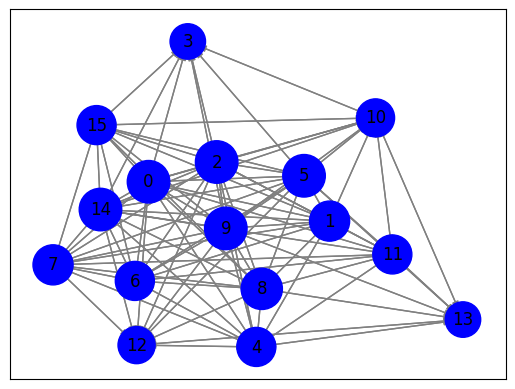

Closeness Centrality:
Node 0: 0.9375
Node 2: 0.9375
Node 5: 0.9375
Node 9: 0.9375
Node 14: 0.9375
Node 8: 0.8824
Node 1: 0.8333
Node 7: 0.8333
Node 4: 0.7895
Node 6: 0.7895
Node 11: 0.7895
Node 15: 0.7895
Node 10: 0.7500
Node 12: 0.7143
Node 3: 0.6522
Node 13: 0.6522


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)
node_size = [v * 1000 for v in closeness_centrality.values()]

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
sorted_closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, centrality in sorted_closeness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

In [ ]:
top_nodes = {}  # Membuat dictionary untuk menyimpan tiga node teratas

# Mengambil tiga node teratas
count = 0
for node, centrality in sorted_closeness_centrality.items():
    top_nodes[node] = centrality
    count += 1
    if count == 3:
        break

for node, centrality in sorted_closeness_centrality.items():
    node_index = int(node)  # Mendapatkan indeks node dari nama node
    sentence = sentences[node_index]  # Mengambil kalimat yang sesuai dengan node
    print(f"{node}: {centrality:.4f} - {sentence}")

0: 0.9375 - 
				Jember, Jawa Timur (ANTARA) - Pasangan bakal calon presiden (capres) dan calon wakil presiden (cawapres) , Anies Baswedan dan Muhaimin Iskandar mengajak warga Kabupaten Jember, Jawa Timur mendoakan rakyat Palestina agar segera merdeka dan menjadi bangsa yang mandiri.
2: 0.9375 - Ia mengajak ribuan warga yang hadir dalam kegiatan jalan sehat bersarung di Jember untuk membaca surat Al-Fatihah bersama-sama dengan harapan bangsa Palestina segera merdeka dan menjadi bangsa yang mandiri.
5: 0.9375 - Menurutnya Indonesia harus memberikan pertolongan kepada rakyat Palestina karena Indonesia sebagai negara dengan penduduk muslim terbesar, sehingga bisa menolong negara lain.
9: 0.9375 - "Saya ingin sampaikan apresiasi kepada Ibu Menlu yang di dalam Sidang PBB menyampaikan sikap yang tegas, yang jelas, atas posisi Indonesia," katanya.
14: 0.9375 - Dalam sidang darurat Majelis Umum Persatuan Bangsa-Bangsa, di New York, Amerika Serikat, Kamis (26/10), Menlu Retno mengecam Dewan Kea